In [39]:
from sklearn import datasets
import numpy as np

In [40]:
type(datasets)
iris=datasets.load_iris()

In [41]:
X = iris.data[:,[2,3]]

In [42]:
y = iris.target

In [43]:
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
X_train[:5]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2]])

In [46]:
len(y_test[y_test==0])/len(y_test)

0.3333333333333333

In [47]:
len(y_train[y_train==0])/len(y_train)

0.3333333333333333

In [48]:
print('Labels counts in y:',np.bincount(y))

Labels counts in y: [50 50 50]


In [49]:
print('Labels counts in y_train:',np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [50]:
print('Labels counts in y_test:',np.bincount(y_test))

Labels counts in y_test: [15 15 15]


Standardization using SKlearn tools

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()

In [53]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
X_train_std = sc.transform(X_train)

In [55]:
X_test_std = sc.transform(X_test)

In [56]:
from sklearn.linear_model import Perceptron

In [57]:
ppn = Perceptron(max_iter=40,eta0 = 0.1, random_state=1)

In [58]:
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [59]:
y_pred = ppn.predict(X_test_std)

In [60]:
print('Misclassified samples: %d' %(y_test != y_pred).sum())

Misclassified samples: 3


In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy : %2f' %accuracy_score(y_test,y_pred))

Accuracy : 0.933333


In [62]:
ppn.score(X_test_std,y_test)

0.9333333333333333

Visualize Decision Regions

In [63]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [64]:
def plot_decision_regions(X,y,classifier, test_idx = None, resolution =0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y = X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolors='black')
        
    # heighlight test samples
    if test_idx:
        # plot all samples
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='', edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100,label='test set')

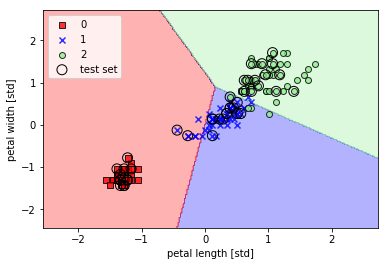

In [65]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

Support Vector Machine (SVM)

In [66]:
from sklearn.svm import SVC

In [67]:
svm = SVC(C=100,kernel='linear',random_state=1)

In [69]:
svm.fit(X_train_std,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

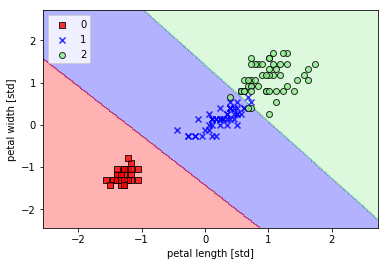

In [72]:
plt.figure()
plot_decision_regions(classifier=svm,X=X_combined_std,y=y_combined)
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()